In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_docs.modeling as tfdoc_model
from sklearn.utils import shuffle
from autocpd.neuralnetwork import compile_and_fit, general_simple_nn
from autocpd.utils import DataGenAlternative, GenDataMean

np.random.seed(2022)      # numpy seed fixing
tf.random.set_seed(2022)  # tensorflow seed fixing

### GENERATE DATA

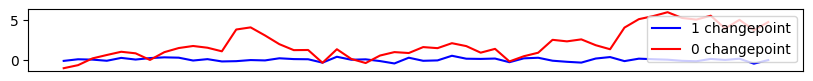

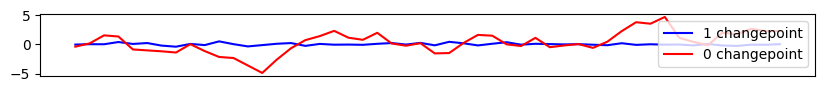

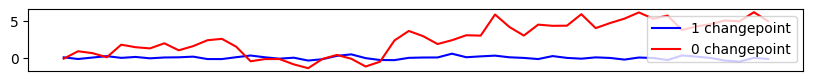

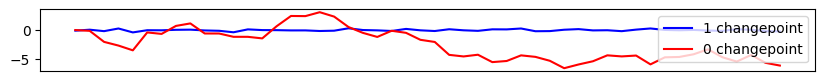

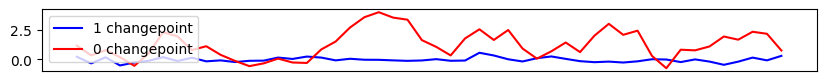

In [2]:
# generate data parameters
n = 50     # the length of time series
mu_L = 0    # mean of left segment
N = 1000      # number of samples for each class

# generate data: has one changepoint
result = DataGenAlternative(
    N_sub=N,
    B=np.sqrt(8 * np.log(n / 0.05) / n),
    mu_L=mu_L,
    n=n,
    B_bound=np.array([1, 2]),
    ARcoef=0.7,
    tau_bound=10,
    ar_model="AR0",
)

data_alt = result["data"]

# generate data: has zero changepoint
data_null = GenDataMean(N, n, cp=None, mu=(mu_L, mu_L), sigma=0.2)

# combine
data_all = np.concatenate((data_alt, data_null), axis=0)
y_all = np.repeat((1, 0), N).reshape((2 * N, 1))

# generate the training dataset and test dataset
x_train, y_train = shuffle(
    data_all, y_all, random_state=42
)

# Plot each time series in the combined dataset
for i in range(5):
    plt.figure(figsize=(10, 0.8))  # Corrected figsize parameter
    plt.plot(data_all[i + N], color='blue' if y_all[i] == 1 else 'red', label=f"{y_all[i][0]} changepoint")  # Color by label
    plt.plot(data_all[i], color='blue' if y_all[i+N] == 1 else 'red', label=f"{y_all[i+N][0]} changepoint")  # Color by label
    plt.legend()
    plt.xticks([])
    plt.show()

### TRAIN MODEL

In [3]:
model_name = 'test_model'
model = general_simple_nn(n=n,                      # input size
                          l=1,                      # number of hidden layers
                          m=20,                     # layer size (neurons)
                          num_classes=2,            # number of classes
                          model_name=model_name)
model.summary()

Model: "test_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            42 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,062 (4.15 KB)

 Trainable params: 1,062 (4.15 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# parameters for neural network
learning_rate = 1e-3
epochs = 200
batch_size = 32

# train
logdir = ''
size_histories = {}
epochdots = tfdoc_model.EpochDots()
size_histories[model_name] = compile_and_fit(
    model,
    x_train,
    y_train,
    batch_size,
    learning_rate,
    model_name,
    logdir,
    epochdots,
    max_epochs=epochs,
)

# save
model.save(f"{model_name}/{model_name}.keras")

Epoch 1/200

Epoch: 0, accuracy:0.6263,  loss:1.0121,  sparse_categorical_crossentropy:0.7467,  val_accuracy:0.7950,  val_loss:0.6614,  val_sparse_categorical_crossentropy:0.4087,  
.50/50 - 1s - 19ms/step - accuracy: 0.6263 - loss: 1.0121 - sparse_categorical_crossentropy: 0.7467 - val_accuracy: 0.7950 - val_loss: 0.6614 - val_sparse_categorical_crossentropy: 0.4087
Epoch 2/200
.50/50 - 0s - 2ms/step - accuracy: 0.8869 - loss: 0.5577 - sparse_categorical_crossentropy: 0.3181 - val_accuracy: 0.9550 - val_loss: 0.5147 - val_sparse_categorical_crossentropy: 0.2892
Epoch 3/200
.50/50 - 0s - 2ms/step - accuracy: 0.9875 - loss: 0.4448 - sparse_categorical_crossentropy: 0.2326 - val_accuracy: 0.9975 - val_loss: 0.4182 - val_sparse_categorical_crossentropy: 0.2193
Epoch 4/200
.50/50 - 0s - 2ms/step - accuracy: 0.9994 - loss: 0.3631 - sparse_categorical_crossentropy: 0.1758 - val_accuracy: 0.9975 - val_loss: 0.3413 - val_sparse_categorical_crossentropy: 0.1658
Epoch 5/200
.50/50 - 0s - 2ms/ste